In [18]:
# importing the values
import numpy as np
import matplotlib.pyplot as plt 
import time
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
from statistics import mean

#loading the MNIST set provoded in assignemnt one
## Load the training set
train_data = np.load('train_data.npy')
train_labels = np.load('train_labels.npy')

## Load the testing set
test_data = np.load('test_data.npy')
test_labels = np.load('test_labels.npy')

In [19]:
#creating the defination which can convert labels into classification values.

def generating_lables(value,lab_list):
    binarylab = []
    for i in list(lab_list):
        if value == i:
            binarylab.append(1)
        else:
            binarylab.append(0)
    return binarylab 

## binary classification train and test data manupulation

In [20]:
# For each digit 0 to 9, Creating a array for binary classification for train label set
# with the help of above defination
data_train_labels = []
for i in range(10):
    data_train_labels.append(generating_lables(i,train_labels))

In [21]:
# For each digit 0 to 9, Creating a array for binary classification for test label set
# with the help of above defination
data_test_labels = []
for i in range(10):
    data_test_labels.append(generating_lables(i,test_labels))

## Scale each data value to be between 0 and 1

In [22]:

x_train = train_data / 255
x_test =test_data / 255

In [23]:
#refrence perceptron
#https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/perceptron.py

# my class perceptron
class MLPClassifier:
    def __init__(self,learning_rate_init=0.01):
        self.learning = learning_rate_init
        ## Choose small random initial weights, wi 2 [􀀀:05; :05]
        self.weights = np.random.uniform(-0.05, 0.05, (784))
        # bias unit is always set to 1,
        self.bias = 1
        self.weight_value = 0
        self.weight_next = None
        self.bias_next = None

    # only single run fit method
    def partial_fit(self, X, y):
        # inittalizing the weight such thatit didnot update after itration and later it will update

        #updating only if the bais and wieght dummy is not NONE
        if self.bias_next != None: 
            self.weights = self.weight_next
            self.bias = self.bias_next

        weights = self.weights
        bias = self.bias
        # The learninig curve for perceptron

        # iF output is correct then 1 or zero
        y_ = np.array([1 if i > 0 else 0 for i in y])
        for idx, x_i in enumerate(X):

            linear_output = np.dot(x_i,self.weights) + self.bias
            prediction = self.activation_func(linear_output)

            # Perceptron updates rules
            update = self.learning * (y_[idx] - prediction)
            # new weight and bias but not updated to the attributes
            self.weights += update * x_i
            self.bias += update

        self.weight_next = self.weights
        self.bias_next = bias

    # prediction for the values
    def predict(self, X):
        #saving the weight value so that we can use it for the classification
        self.weight_value = np.dot(X, self.weights) + self.bias
        prediction = self.activation_func(self.weight_value)
        return prediction

    # the unit step fuction for activation
    def activation_func(self, x):
        return np.where(x >= 0, 1, 0)


# Testing code
# def score(y_true, y_pred):
#     accuracy = np.sum(y_true == y_pred) / len(y_true)
#     return accuracy


# p0 = MLPClassifier(learning_rate_init=0.01)
# p0.partial_fit(x_train, data_train_labels[1])
# predictions = p0.predict(x_test[0])
# p0.weight_value


In [24]:
#testing for perceptron
p0 = MLPClassifier(learning_rate_init=0.01)
p0.partial_fit(x_train, data_train_labels[7])
prid = p0.predict(x_test[7])
p0.weight_value

1.8275700476251762

In [25]:
#testing for perceptron
p1 = MLPClassifier(learning_rate_init=0.01)
p1.partial_fit(x_train, data_train_labels[1])
p1.predict(x_test[6])
p1.weight_value

-3.105768684649806

In [26]:
# # the defination for the accuracy count
# def score(true_label, pred_label):
#     accuracy = np.sum(true_label == pred_label) / len(true_label)
#     return accuracy

In [27]:
# print("Perceptron classification accuracy", p0.score(data_test_labels[7], predictions))

In [28]:
# the main class
# creating 10 perceptron each with training for only on digit.
class run_perceptron():
    def __init__(self, learning_rate, iteration):
        self.itration = iteration
        self.learn_rate = learning_rate
        self.MLP0 = MLPClassifier(learning_rate_init=self.learn_rate)
        self.MLP1 = MLPClassifier(learning_rate_init=self.learn_rate)
        self.MLP2 = MLPClassifier(learning_rate_init=self.learn_rate)
        self.MLP3 = MLPClassifier(learning_rate_init=self.learn_rate)
        self.MLP4 = MLPClassifier(learning_rate_init=self.learn_rate)
        self.MLP5 = MLPClassifier(learning_rate_init=self.learn_rate)
        self.MLP6 = MLPClassifier(learning_rate_init=self.learn_rate)
        self.MLP7 = MLPClassifier(learning_rate_init=self.learn_rate)
        self.MLP8 = MLPClassifier(learning_rate_init=self.learn_rate)
        self.MLP9 = MLPClassifier(learning_rate_init=self.learn_rate)
        self.max_val = []
        self.labels = []
        self.main_acc = []
        self.pred_list = []
        self.train_acc = []
        self.train_set = x_train
        self.test_labels = data_test_labels
        self.test_labels = data_train_labels


    # # the defination for the accuracy count
    def score(self,true_label, pred_label):
        accuracy = np.sum(np.array(true_label) == np.array(pred_label)) / len(true_label)
        return accuracy    

    # the main method which runs the indiviual test data (image) so that all perceptron can take the input
    def run(self):
        self.main_acc = []
        self.train_acc = []
        for _ in range(self.itration):
            self.train_all(self.test_labels,True)

            self.train_all(self.test_labels,False)


    def train_all(self,label,flag):
        #fittting the perceptron
        self.MLP0.partial_fit(self.train_set, label[0])
        self.MLP1.partial_fit(self.train_set, label[1])
        self.MLP2.partial_fit(self.train_set, label[2])
        self.MLP3.partial_fit(self.train_set, label[3])
        self.MLP4.partial_fit(self.train_set, label[4])
        self.MLP5.partial_fit(self.train_set, label[5])
        self.MLP6.partial_fit(self.train_set, label[6])
        self.MLP7.partial_fit(self.train_set, label[7])
        self.MLP8.partial_fit(self.train_set, label[8])
        self.MLP9.partial_fit(self.train_set, label[9])
        
        self.labels = []
        # runs indivual image to all perceptron
        for j in range(len(x_test)):
            self.max_val = []
            self.pred_list = []
            self.cal_pridiction(self.MLP0,j)
            self.cal_pridiction(self.MLP1,j)
            self.cal_pridiction(self.MLP2,j)
            self.cal_pridiction(self.MLP3,j)
            self.cal_pridiction(self.MLP4,j)
            self.cal_pridiction(self.MLP5,j)
            self.cal_pridiction(self.MLP6,j)
            self.cal_pridiction(self.MLP7,j)
            self.cal_pridiction(self.MLP8,j)
            self.cal_pridiction(self.MLP9,j)
            ##The output with the highest value of w:xk
            max_v = max(self.max_val)           
            self.labels.append(self.max_val.index(max_v))   
        #accuracy for each epochs
        accuracy = self.score(test_labels,self.labels)
        if flag == True:
            self.main_acc.append(accuracy)
        else:
            self.train_acc.append(accuracy)    
        return 

    # defination for finding of w:xk and appending to the list
    def cal_pridiction(self,model,j):
        self.pred_list.append(model.predict(x_test[j]))
        w_val0 = model.weight_value
        self.max_val.append(w_val0)
        return
        

    # Ploting the plot line for accuracy
    def plot_line(self):
        sns.lineplot(x=[x for x in range(self.itration)], y = self.main_acc, label="Testing Set")
        sns.lineplot(x=[x for x in range(self.itration)], y = self.train_acc, label="Training Set")      
        # sns.lineplot(x=[x for x in range(50)], y=main_accuracy_train, label="Training Set")
        plt.title( 'Accuracy for 50 epochs' , size = 12 )
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
        print("------------------------------------------------------------")    

    # plotting the confusion matrix
    #https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
    #for beautiful confusion matrix
    def confusion_matrix(self):
        con_fu = confusion_matrix(test_labels, self.labels)
        ax= plt.subplot()
        sns.heatmap(con_fu, annot=True, fmt='g', ax=ax)  
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels') 
        ax.set_title('Confusion Matrix')
        plt.show()  
        print("------------------------------------------------------------")          

In [29]:
#calling for 0.001 learning rate
learn1 = run_perceptron(0.001,15)
learn1.run()


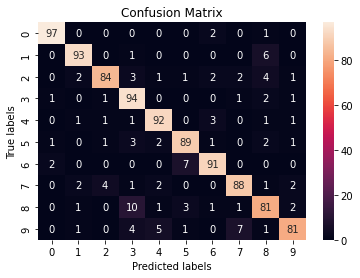

------------------------------------------------------------


In [31]:
learn1.confusion_matrix()

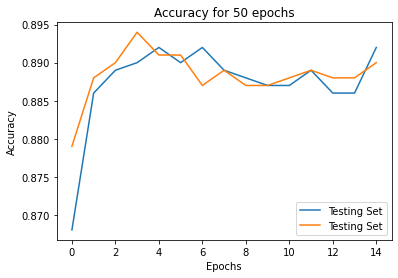

------------------------------------------------------------


In [32]:
learn1.plot_line()

### Call of 3 different learning rate

## change the epochs to 50 first for above code
## uncommet the code and go banana!!

In [ ]:
# learn2 = run_perceptron(0.01,50)
# learn2.run()
# learn2.confusion_matrix()
# learn2.plot_line()

In [ ]:
# learn3 = run_perceptron(0.01,50)
# learn3.run()
# learn3.confusion_matrix()
# learn3.plot_line()

In [ ]:
def main():
    print("For learning rate 0.01")
    learn1 = run_perceptron(0.01,50)
    learn1.run()
    learn1.confusion_matrix()
    learn1.plot_line()

    print("For learning rate 0.1")
    learn2 = run_perceptron(0.1,50)
    learn2.run()
    learn2.confusion_matrix()
    learn2.plot_line()

    print("For learning rate 1.0")
    learn3 = run_perceptron(1.0,50)
    learn3.run()
    learn3.confusion_matrix()
    learn3.plot_line()

In [ ]:
main()